In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,33302027.1824,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,43746480.7428,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,31795139.4170,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,26805298.3432,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,43410532.5882,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,36166332.0827,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,39192588.2370,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,46415035.8381,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,40370354.9653,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,42596794.8671,6526.6220,0.7256,0.8131,0.4802


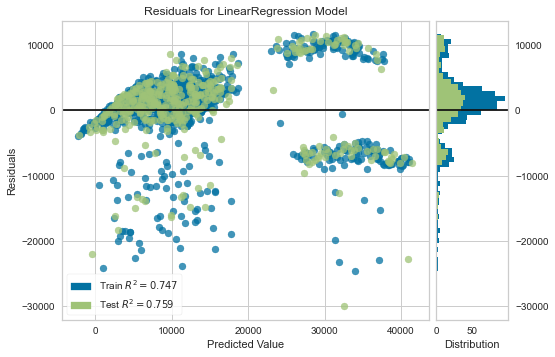

In [5]:
plot_model(lr)

# Experiment 2

In [6]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
s2[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'sex_male', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age_0.0', 'age_1.0',
       'age_10.0', 'age_11.0', 'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0',
       'age_6.0', 'age_7.0', 'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0',
       'bmi_10.0', 'bmi_11.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0',
       'bmi_6.0', 'bmi_7.0', 'bmi_8.0', 'bmi_9.0',
       'bmi_Power2_multiply_smoker_no', 'sex_male_multiply_bmi_Power2',
       'bmi_7.0_multiply_smoker_yes', 'bmi_Power2_multiply_age_Power2',
       'bmi_4.0_multiply_smoker_yes', 'smoker_yes_multiply_children_1',
       'smoker_yes_multiply_age_Power2', 'children_2_multiply_age_Power2',
       'smoker_yes_multiply_bmi_Power2', 'smoker_yes_multiply_children_0',
       'smoker_no_multiply_bmi_Power2', 'age_Power2_multiply_smok

In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2736.5603,19462900.9553,4411.6778,0.8838,0.3919,0.3110
1,3397.0026,32711818.1959,5719.4246,0.8098,0.4554,0.3385
2,2765.5967,21988541.4637,4689.1941,0.7216,0.4987,0.3309
3,3001.3640,23135051.7337,4809.8910,0.8068,0.5139,0.4167
4,3004.0893,26265566.3671,5124.9943,0.8046,0.4359,0.2730
5,3167.3734,23671511.6101,4865.3378,0.8477,0.3665,0.2889
6,2783.1541,24112792.1178,4910.4778,0.8359,0.3767,0.3098
7,3248.4338,28750973.1805,5361.9934,0.8419,0.4679,0.3047
8,2908.1999,20968095.0605,4579.0933,0.8646,0.3977,0.3389
9,3060.4983,28708104.5435,5357.9945,0.8151,0.4941,0.3410


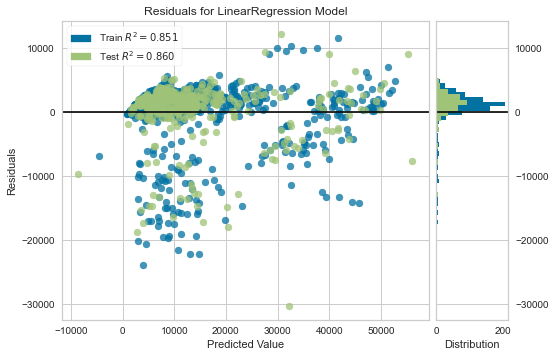

In [9]:
plot_model(lr)

In [10]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


In [11]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [12]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('rem_outliers', Empty()), ('cluster_all', Empty()),
                 ('dummy', Dummify(target='charges')), ('fix_perfect', Empty()),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
          

In [13]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
